### In this project we are going to predict if a patient is suffering from Parkinson's disease based on the audio/ voice measures. 

In [1]:
# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
df=pd.read_csv('Parkinson_V2.csv')
# Reading dataset

In [4]:
# loading the dataset

In [5]:
df

,name,Gender,Age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,0,78,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,0,78,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,0,78,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,0,78,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,0,78,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,1,66,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,1,66,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,1,66,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,1,66,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.shape
# The dataset has 195 rows and 24 columns.

(195, 26)

In [7]:
df.isnull().sum()
# There are no null values in the dataframe.

name                0
Gender              0
Age                 0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.info()
# Using df.info we can find the presence of missing values at the same time view the types of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   Gender            195 non-null    int64  
 2   Age               195 non-null    int64  
 3   MDVP:Fo(Hz)       195 non-null    float64
 4   MDVP:Fhi(Hz)      195 non-null    float64
 5   MDVP:Flo(Hz)      195 non-null    float64
 6   MDVP:Jitter(%)    195 non-null    float64
 7   MDVP:Jitter(Abs)  195 non-null    float64
 8   MDVP:RAP          195 non-null    float64
 9   MDVP:PPQ          195 non-null    float64
 10  Jitter:DDP        195 non-null    float64
 11  MDVP:Shimmer      195 non-null    float64
 12  MDVP:Shimmer(dB)  195 non-null    float64
 13  Shimmer:APQ3      195 non-null    float64
 14  Shimmer:APQ5      195 non-null    float64
 15  MDVP:APQ          195 non-null    float64
 16  Shimmer:DDA       195 non-null    float64
 1

In [9]:
df.describe()
# The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

,Gender,Age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.410256,66.051282,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,0.493146,9.674999,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,46.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,0.000000,61.000000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,0.000000,66.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,1.000000,73.000000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,1.000000,85.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
df.columns
# Displaying the column names of the dataframe.

Index(['name', 'Gender', 'Age', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
# These are the column names as seen in the dataset.

# Attribute Information:

## Matrix column entries (attributes):
### name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [12]:
df['status'] 
# The Status column is the target column.

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [13]:
# status - Health status of the subject (one) - Parkinson's, (zero) - healthy

# Visualization

[]

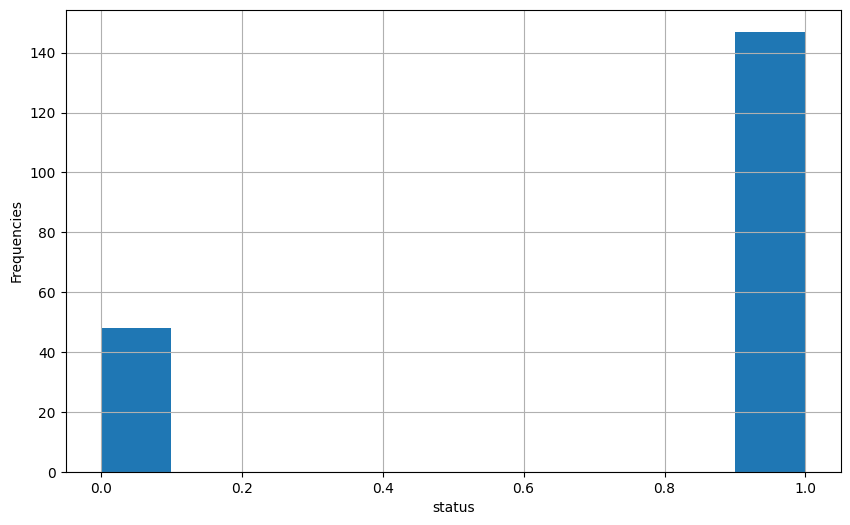

In [14]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
# The dataset has high number of patients effected with Parkinson's disease.

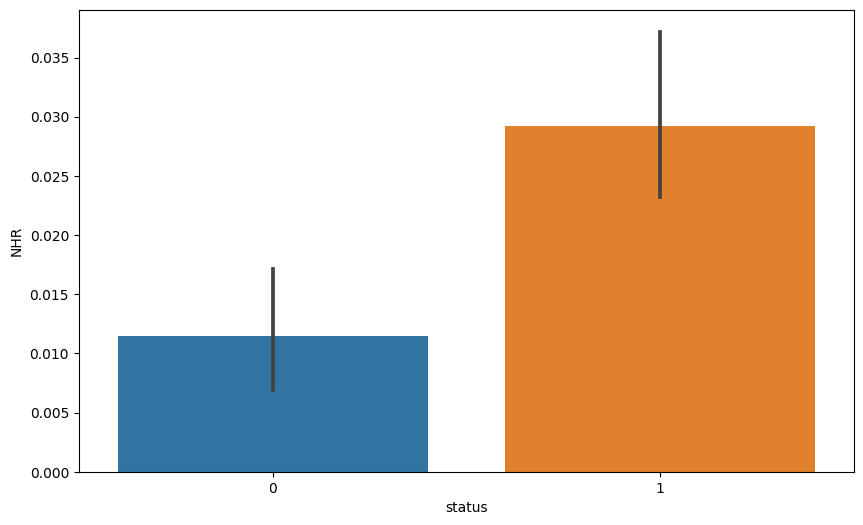

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df);
# The patients effected with Parkinson's disease have high NHR that is the measures of ratio of noise to tonal components in the voice.

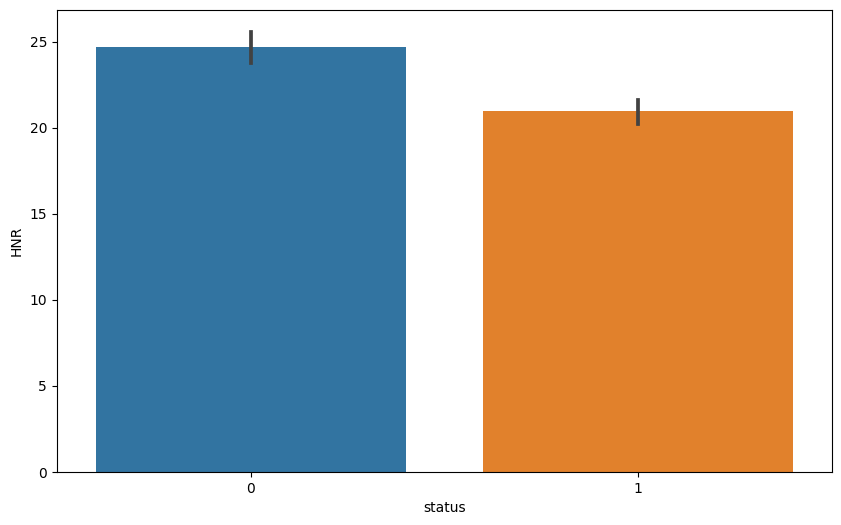

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);
# The patients effected with Parkinson's disease have high HNR that is the measures of ratio of noise to tonal components in the voice.

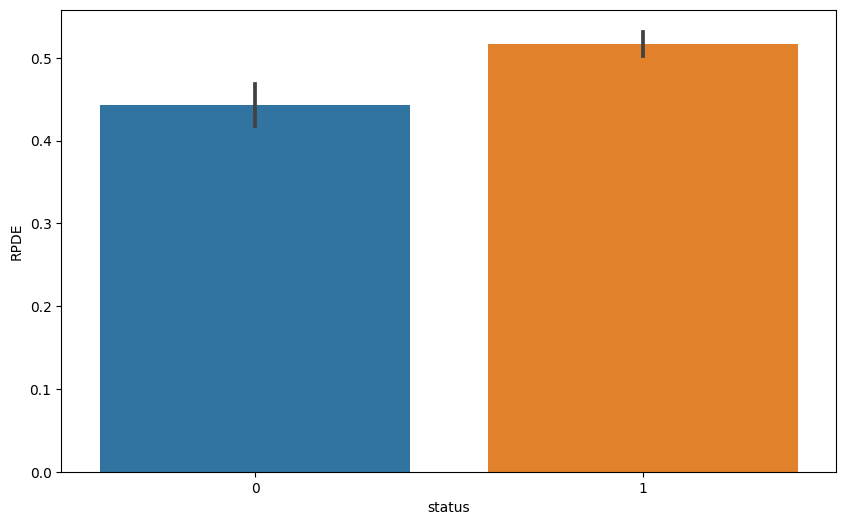

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);
# The nonlinear dynamical complexity measure RPDE is high in the patients effected with Parkinson's disease.

## Distribution plot

C:\Users\KoonJamesZ\AppData\Local\Temp\ipykernel_6820\964976901.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users\KoonJamesZ\AppData\Local\Temp\ipykernel_6820\964976901.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users

C:\Users\KoonJamesZ\AppData\Local\Temp\ipykernel_6820\964976901.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users\KoonJamesZ\AppData\Local\Temp\ipykernel_6820\964976901.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
C:\Users

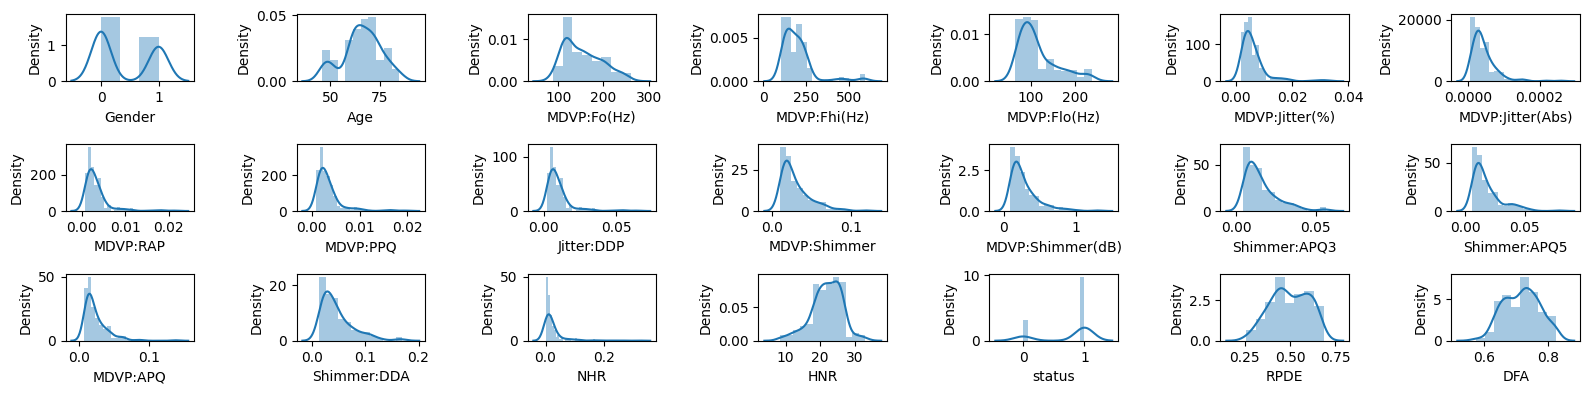

In [18]:
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

## A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension

In [19]:
df.drop(['name'],axis=1,inplace=True)
# Removing  name column for machine learning algorithms.

In [20]:
X=df.drop(labels=['status'],axis=1)
Y=df['status']
X.head()
### Spitting the dataset into x and y

,Gender,Age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0,78,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,0,78,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,0,78,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,0,78,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,0,78,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
X.head()
# Displaying X head 

,Gender,Age,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0,78,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,0,78,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,0,78,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,0,78,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,0,78,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
Y.head()
# Displaying Y head

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score, cross_validate
def train_model(algorithm, K, X, y):
    """This function trains the model and returns the model scores"""    
    def cross_validation(algorithm, _X, _y, _cv):
        _scoring = ['accuracy', 'precision', 'recall', 'f1']
        results = cross_validate(estimator=algorithm,
                                X=_X,
                                y=_y,
                                cv=_cv,
                                scoring=_scoring,
                                return_train_score=True,
                                return_estimator=True
                                )
        
        return results

    result = cross_validation(algorithm,X,y,K)

    best_score = list(result['test_f1']).index(max(result['test_f1']))
    

    accuracy_train =  '{0:.2f}'.format(result['train_accuracy'].mean())
    precision_train = '{0:.2f}'.format(result['train_precision'].mean())
    recall_train = '{0:.2f}'.format(result['train_recall'].mean())
    f1_train = '{0:.2f}'.format(result['train_f1'].mean())

    accuracy =  '{0:.4f}'.format(result['test_accuracy'].mean())
    precision = '{0:.4f}'.format(result['test_precision'].mean())
    recall = '{0:.4f}'.format(result['test_recall'].mean())
    f1 = '{0:.4f}'.format(result['test_f1'].mean()) 

    # accuracy =  '{0:.4f}'.format(result['test_accuracy'][best_score])
    # precision = '{0:.4f}'.format(result['test_precision'][best_score])
    # recall = '{0:.4f}'.format(result['test_recall'][best_score])
    # f1 = '{0:.4f}'.format(result['test_f1'][best_score])
    model=result["estimator"][best_score]
    

    return accuracy_train,precision_train,recall_train,f1_train, accuracy, precision, recall, f1, model


# Machine learning

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression()
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)


Model accuracy on train is: 0.88
Model precision on train is: 0.89
Model recall on train is: 0.96
Model F1 on train is: 0.92 

Model accuracy on test is: 0.8051
Model precision on test is: 0.8507
Model recall on test is: 0.9189
Model F1 on test is: 0.8785


c:\Users\KoonJamesZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\KoonJamesZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

# Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(n_estimators=10000)
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1,model = train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)


Model accuracy on train is: 1.00
Model precision on train is: 1.00
Model recall on train is: 1.00
Model F1 on train is: 1.00 

Model accuracy on test is: 0.8000
Model precision on test is: 0.8252
Model recall on test is: 0.9457
Model F1 on test is: 0.8787


# Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier()
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1 ,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 1.00
Model precision on train is: 1.00
Model recall on train is: 1.00
Model F1 on train is: 1.00 

Model accuracy on test is: 0.7487
Model precision on test is: 0.8069
Model recall on test is: 0.8701
Model F1 on test is: 0.8359


# Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
algorithm = GaussianNB()
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1,model = train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 0.73
Model precision on train is: 0.97
Model recall on train is: 0.66
Model F1 on train is: 0.79 

Model accuracy on test is: 0.7077
Model precision on test is: 0.9348
Model recall on test is: 0.6740
Model F1 on test is: 0.7773


# K-NearestNeighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier
algorithm = KNeighborsClassifier()
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1 ,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 0.91
Model precision on train is: 0.93
Model recall on train is: 0.95
Model F1 on train is: 0.94 

Model accuracy on test is: 0.7128
Model precision on test is: 0.7842
Model recall on test is: 0.8501
Model F1 on test is: 0.8139


# SupportVectorMachine

In [29]:
from sklearn.svm import SVC

algorithm = SVC(kernel='linear')
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1 ,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 0.89
Model precision on train is: 0.89
Model recall on train is: 0.98
Model F1 on train is: 0.93 

Model accuracy on test is: 0.8205
Model precision on test is: 0.8546
Model recall on test is: 0.9386
Model F1 on test is: 0.8890


# Histogram-Based Gradient Boosting

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
algorithm = HistGradientBoostingClassifier(max_iter=100)
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1 ,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 1.00
Model precision on train is: 1.00
Model recall on train is: 1.00
Model F1 on train is: 1.00 

Model accuracy on test is: 0.8103
Model precision on test is: 0.8342
Model recall on test is: 0.9389
Model F1 on test is: 0.8828


# XGBClassifier

In [31]:
from xgboost import XGBClassifier
algorithm = XGBClassifier()
accuracy_train, precision_train, recall_train, f1_train, accuracy, precision, recall, f1 ,model= train_model(algorithm, 5, X, Y)
print("Model accuracy on train is:", accuracy_train)
print("Model precision on train is:", precision_train)
print("Model recall on train is:", recall_train)
print("Model F1 on train is:", f1_train,"\n")


print("Model accuracy on test is:", accuracy)
print("Model precision on test is:", precision)
print("Model recall on test is:", recall)
print("Model F1 on test is:", f1)

Model accuracy on train is: 1.00
Model precision on train is: 1.00
Model recall on train is: 1.00
Model F1 on train is: 1.00 

Model accuracy on test is: 0.8410
Model precision on test is: 0.8482
Model recall on test is: 0.9660
Model F1 on test is: 0.9026
